Importing necessary Libraries

In [27]:
import os
import pandas as pd
from collections import Counter
from bisect import bisect_left

import matplotlib.colors as mcolors

import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'd:\\_MISC\\adhaar_data'

Combining all 4 demographic csv files into single dataframe

In [28]:
# Get all csv files from api_data_aadhar_enrolment directory
csv_files = [f for f in os.listdir('api_data_aadhar_demographic') if f.endswith('.csv')]

# Read and combine all csv files
dfs = [pd.read_csv(os.path.join('api_data_aadhar_demographic', file)) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Save combined dataframe to csv
# df.to_csv('try.csv', index=False)
print(f'Combined {len(csv_files)} files into single dataframe')
print(df.shape)

Combined 5 files into single dataframe
(2071700, 6)


Check Data-Types

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [30]:
df.nunique()

date                95
state               65
district           983
pincode          19742
demo_age_5_17      614
demo_age_17_      2668
dtype: int64

Convert date column to datetime format and add Month Column

In [31]:
df['date'] = pd.to_datetime(df['date'],format = "%d-%m-%Y")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   state          object        
 2   district       object        
 3   pincode        int64         
 4   demo_age_5_17  int64         
 5   demo_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 94.8+ MB


Checking state column for cleaning

In [33]:
df['state'].value_counts()

state
Andhra Pradesh          207687
Tamil Nadu              196857
West Bengal             168623
Uttar Pradesh           167889
Maharashtra             162242
                         ...  
Madanapalle                  2
100000                       2
Puttenahalli                 1
Nagpur                       1
Raja Annamalai Puram         1
Name: count, Length: 65, dtype: int64

In [34]:
df.isnull().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Checking For spelling Mistakes

In [35]:
print('Total unique values in state column :',len(df['state'].unique()))
sorted(df['state'].unique())

Total unique values in state column : 65


['100000',
 'Andaman & Nicobar Islands',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'BALANAGAR',
 'Bihar',
 'Chandigarh',
 'Chhatisgarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Daman and Diu',
 'Darbhanga',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jaipur',
 'Jammu & Kashmir',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madanapalle',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Nagpur',
 'ODISHA',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Puttenahalli',
 'Raja Annamalai Puram',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'WEST BENGAL',
 'WESTBENGAL',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'West Bengli',
 'West bengal',
 'Westbengal',
 'an

Gathering Pin-code Data

In [36]:
# Pincode data taken from
# https://www.data.gov.in/resource/all-india-pincode-directory-till-last-month

#Extracted all Pincodes and respective [district,statename]
pin_df = pd.read_csv('./pin_code_data.csv')
# Extract unique pincode to [district, statename] mapping
pincode_mapping = pin_df[['pincode', 'district', 'statename']].dropna().drop_duplicates(subset=['pincode']).set_index('pincode')[['district', 'statename']].to_dict('index')
print(len(pincode_mapping))
print(pincode_mapping[811315])

19486
{'district': 'JAMUI', 'statename': 'BIHAR'}


Find all pincodes that are present in our data but not in pincode_mapping

In [37]:
s1 = set(df['pincode'].unique())
s2 = set(pincode_mapping.keys())
needed_pins = sorted(s1.difference(s2))
print(len(needed_pins))
print(needed_pins)

946
[100000, 121705, 127110, 133021, 133105, 134002, 134011, 134115, 141017, 141124, 142028, 142051, 143003, 143007, 143026, 143104, 143110, 144004, 144011, 144012, 144013, 144014, 144203, 144304, 145021, 147506, 171302, 171303, 171304, 173020, 173028, 173216, 173219, 174401, 174402, 174403, 175122, 175137, 176120, 176121, 176122, 176123, 176126, 176213, 176219, 177030, 182117, 185111, 191123, 192102, 192306, 193198, 193202, 194204, 194402, 194403, 194404, 201308, 202389, 202390, 202391, 202392, 202393, 202394, 202395, 202396, 202397, 202398, 202399, 202410, 202411, 202412, 202413, 202414, 202415, 202421, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 205130, 205135, 205141, 205142, 205145, 205147, 205151, 205152, 205302, 206301, 206302, 206303, 206451, 207501, 207502, 207503, 207504, 207505, 209201, 209407, 209506, 209715, 210010, 211009, 212210, 212623, 212660, 212662, 212666, 215126, 216221, 221102, 221113, 221209, 221210, 222101, 222102, 222103, 222107, 222108, 222

Use 3-Nearest Neighbors and 1-Nearest Neighbors to fill the missing data

In [38]:
left_pincode_mapping = {}
keys = sorted(pincode_mapping.keys())
n = len(keys)
_1nncount,_3nncount=0,0
for pin in needed_pins:
    pos = bisect_left(keys, pin)
    lo = max(0, pos - 3)
    hi = min(n, pos + 3)
    candidate_keys = keys[lo:hi]
    nearest = sorted(candidate_keys, key=lambda k: abs(k - pin))[:3]
    candidates = []
    for k in nearest:
        info = pincode_mapping.get(k)
        if info:
            candidates.append({
                'pincode': k,
                'statename': info.get('statename'),
                'district': info.get('district'),
                'distance': abs(k - pin)
            })
    
    # Check for majority in 3NN
    if candidates:
        state_counter = Counter(c['statename'] for c in candidates)
        district_counter = Counter(c['district'] for c in candidates)
        
        state_majority = state_counter.most_common(1)[0][1] > len(candidates) / 2
        district_majority = district_counter.most_common(1)[0][1] > len(candidates) / 2
        
        if state_majority and district_majority:
            assigned_state = state_counter.most_common(1)[0][0]
            assigned_district = district_counter.most_common(1)[0][0]
            method = '3NN'
            _3nncount+=1
        else:
            # Use 1-NN if no majority
            nearest_1nn = sorted(candidate_keys, key=lambda k: abs(k - pin))[:1]
            info = pincode_mapping.get(nearest_1nn[0])
            assigned_state = info.get('statename') if info else None
            assigned_district = info.get('district') if info else None
            method = '1NN'
            _1nncount+=1
    else:
        assigned_state = None
        assigned_district = None
        method = '1NN'
        _1nncount+=1
    
    left_pincode_mapping[pin] = {
        'method': method,
        'assigned': {'statename': assigned_state, 'district': assigned_district},
        'candidates': candidates
    }

print(f'left_pincode_mapping entries: {len(left_pincode_mapping)}')
print(f'1NN: {_1nncount} , 3NN: {_3nncount}')

left_pincode_mapping entries: 946
1NN: 24 , 3NN: 922


In [39]:
len(pincode_mapping),len(left_pincode_mapping)

(19486, 946)

In [40]:
len(set(pincode_mapping.keys()).intersection(set(left_pincode_mapping.keys())))

0

Check for any null values in statename or district in left_pincode_mapping

In [41]:
null_entries = []
for pin, data in left_pincode_mapping.items():
    assigned = data.get('assigned', {})
    if assigned.get('statename') is None or assigned.get('district') is None:
        null_entries.append({
            'pincode': pin,
            'statename': assigned.get('statename'),
            'district': assigned.get('district'),
            'method': data.get('method')
        })

print(f"Total entries with null values: {len(null_entries)}")
if null_entries:
    for entry in null_entries[:10]:  # Show first 10
        print(entry)

Total entries with null values: 0


Merge with pincode_mapping

In [42]:
for key in left_pincode_mapping:
    pincode_mapping[key] = left_pincode_mapping[key]['assigned']
len(set(pincode_mapping.keys()))

20432

Using Pin-code Data to clean State and District Columns

In [43]:
df['state_'] = df['pincode'].map(lambda x: pincode_mapping.get(x, {}).get('statename'))
df['district_'] = df['pincode'].map(lambda x: pincode_mapping.get(x, {}).get('district'))

df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_,district_
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,UTTAR PRADESH,GORAKHPUR
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,ANDHRA PRADESH,CHITTOOR
2,2025-03-01,Gujarat,Rajkot,360006,65,765,GUJARAT,RAJKOT
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,ANDHRA PRADESH,SRIKAKULAM
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,RAJASTHAN,UDAIPUR


Checking If it Worked

In [44]:
df.isnull().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
state_           0
district_        0
dtype: int64

In [45]:
df_null = df[df['state_'].isnull() | df['district_'].isnull()]
df_null['pincode'].value_counts()

Series([], Name: count, dtype: int64)

In [46]:
len(df['district'].unique()),len(df['district_'].unique())

(983, 740)

In [47]:
print(df[df['state']=='Uttarakhand']['district'].value_counts())
print(sum(df[df['state']=='Uttarakhand']['district'].value_counts()))
# We can Spot Hardwarand Haridwar as different, Garhwal is a region not a district


district
Dehradun             3058
Pauri Garhwal        2954
Almora               2341
Tehri Garhwal        1946
Pithoragarh          1879
Chamoli              1785
Nainital             1694
Haridwar             1670
Udham Singh Nagar    1374
Bageshwar            1019
Rudraprayag           927
Uttarkashi            883
Champawat             722
Hardwar               632
Garhwal               181
Name: count, dtype: int64
23065


In [48]:
print(df[df['state_']=='UTTARAKHAND']['district_'].value_counts())
print(sum(df[df['state_']=='UTTARAKHAND']['district_'].value_counts()))
# We can Spot Haridwar and Hardwar are merged, and Garhwal gets divided into pauri and tehri and other districts 

district_
PAURI GARHWAL       3136
DEHRADUN            3053
ALMORA              2345
HARIDWAR            2329
PITHORAGARH         1910
TEHRI GARHWAL       1903
CHAMOLI             1845
UDAM SINGH NAGAR    1641
NAINITAL            1353
BAGESHWAR           1099
UTTAR KASHI          927
RUDRA PRAYAG         867
CHAMPAWAT            692
Name: count, dtype: int64
23100


Checking Date Range

In [49]:
min(df['date']),max(df['date'])
#All data is from 2025

(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

 converting month to Month_name and adding Weekday column

In [50]:
df['Month_name'] = df['date'].dt.month_name()
df['Weekday'] = df['date'].dt.day_name()
#checking for random tuples
df.iloc[[10,34,304,1225]]

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_,district_,Month_name,Weekday
10,2025-03-01,Uttar Pradesh,Ghazipur,233226,134,1591,UTTAR PRADESH,GHAZIPUR,March,Saturday
34,2025-03-01,Bihar,Purnia,854317,27,453,BIHAR,KATIHAR,March,Saturday
304,2025-03-01,West Bengal,Kolkata,700023,58,1226,WEST BENGAL,MURSHIDABAD,March,Saturday
1225,2025-05-01,Madhya Pradesh,Dewas,455223,38,297,MADHYA PRADESH,DEWAS,May,Thursday


Define Regions using states

In [51]:
#Define 6 regions mapping for Indian states
regions = {
'ANDAMAN AND NICOBAR ISLANDS':'SOUTH',
 'ANDHRA PRADESH':'SOUTH',
 'ARUNACHAL PRADESH':'NORTH-EAST',
 'ASSAM':'NORTH-EAST',
 'BIHAR':'EAST',
 'CHANDIGARH':'NORTH',
 'CHHATTISGARH':'CENTRAL',
 'DELHI':'NORTH',
 'GOA':'WEST',
 'GUJARAT':'WEST',
 'HARYANA':'NORTH',
 'HIMACHAL PRADESH':'NORTH',
 'JAMMU AND KASHMIR':'NORTH',
 'JHARKHAND':'EAST',
 'KARNATAKA':'SOUTH',
 'KERALA':'SOUTH',
 'LADAKH':'NORTH',
 'LAKSHADWEEP':'SOUTH',
 'MADHYA PRADESH':'CENTRAL',
 'MAHARASHTRA':'WEST',
 'MANIPUR':'NORTH-EAST',
 'MEGHALAYA':'NORTH-EAST',
 'MIZORAM':'NORTH-EAST',
 'NAGALAND':'NORTH-EAST',
 'ODISHA':'EAST',
 'PUDUCHERRY':'SOUTH',
 'PUNJAB':'NORTH',
 'RAJASTHAN':'NORTH',
 'SIKKIM':'NORTH-EAST',
 'TAMIL NADU':'SOUTH',
 'TELANGANA':'SOUTH',
 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU':'WEST',
 'TRIPURA':'NORTH-EAST',
 'UTTAR PRADESH':'NORTH',
 'UTTARAKHAND':'NORTH',
 'WEST BENGAL':'EAST'}
# Add region column based on state
df['region'] = df['state_'].map(regions)
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_,district_,Month_name,Weekday,region
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,UTTAR PRADESH,GORAKHPUR,March,Saturday,NORTH
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,ANDHRA PRADESH,CHITTOOR,March,Saturday,SOUTH
2,2025-03-01,Gujarat,Rajkot,360006,65,765,GUJARAT,RAJKOT,March,Saturday,WEST
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,ANDHRA PRADESH,SRIKAKULAM,March,Saturday,SOUTH
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,RAJASTHAN,UDAIPUR,March,Saturday,NORTH


Add a total column

In [52]:
df['total']=df['demo_age_5_17']+df['demo_age_17_']

drop the old district and state columns

In [53]:
df = df.drop(columns=['state', 'district'])
df = df[['date', 'Month_name', 'Weekday', 'state_', 'district_', 'pincode','region', 'demo_age_5_17', 'demo_age_17_','total']]
df.iloc[[10,34,304,1225]]

,date,Month_name,Weekday,state_,district_,pincode,region,demo_age_5_17,demo_age_17_,total
10,2025-03-01,March,Saturday,UTTAR PRADESH,GHAZIPUR,233226,NORTH,134,1591,1725
34,2025-03-01,March,Saturday,BIHAR,KATIHAR,854317,EAST,27,453,480
304,2025-03-01,March,Saturday,WEST BENGAL,MURSHIDABAD,700023,EAST,58,1226,1284
1225,2025-05-01,May,Thursday,MADHYA PRADESH,DEWAS,455223,CENTRAL,38,297,335


In [54]:
df.shape

(2071700, 10)

In [55]:
df.isnull().sum()

date             0
Month_name       0
Weekday          0
state_           0
district_        0
pincode          0
region           0
demo_age_5_17    0
demo_age_17_     0
total            0
dtype: int64

Now that cleaning is done, we can use the data for Exploratory Analysis

In [56]:
df.nunique()

date                95
Month_name           9
Weekday              7
state_              36
district_          740
pincode          19742
region               6
demo_age_5_17      614
demo_age_17_      2668
total             2848
dtype: int64

In [57]:
numeric = df[['demo_age_5_17','demo_age_17_','total']]
# print(numeric.describe().to_string(float_format='{:,.3f}'.format))
print('Mean\n',numeric.mean().to_string(float_format='{:,.3f}'.format),"\n")
print('Median\n',numeric.median().to_string(float_format='{:,.3f}'.format),"\n")
print('Min\n',numeric.min().to_string(float_format='{:,.3f}'.format),"\n")
print('Max\n',numeric.max().to_string(float_format='{:,.3f}'.format),"\n")


Mean
 demo_age_5_17    2.348
demo_age_17_    21.447
total           23.795 

Median
 demo_age_5_17   1.000
demo_age_17_    6.000
total           7.000 

Min
 demo_age_5_17    0
demo_age_17_     0
total            0 

Max
 demo_age_5_17     2690
demo_age_17_     16166
total            16942 



# Time/Day based Trend-Analysis

In [58]:
df['Weekday'].value_counts()

Weekday
Friday       329905
Monday       321543
Saturday     315936
Thursday     307108
Tuesday      305073
Wednesday    280766
Sunday       211369
Name: count, dtype: int64

Checking which weekdays have most enrollments

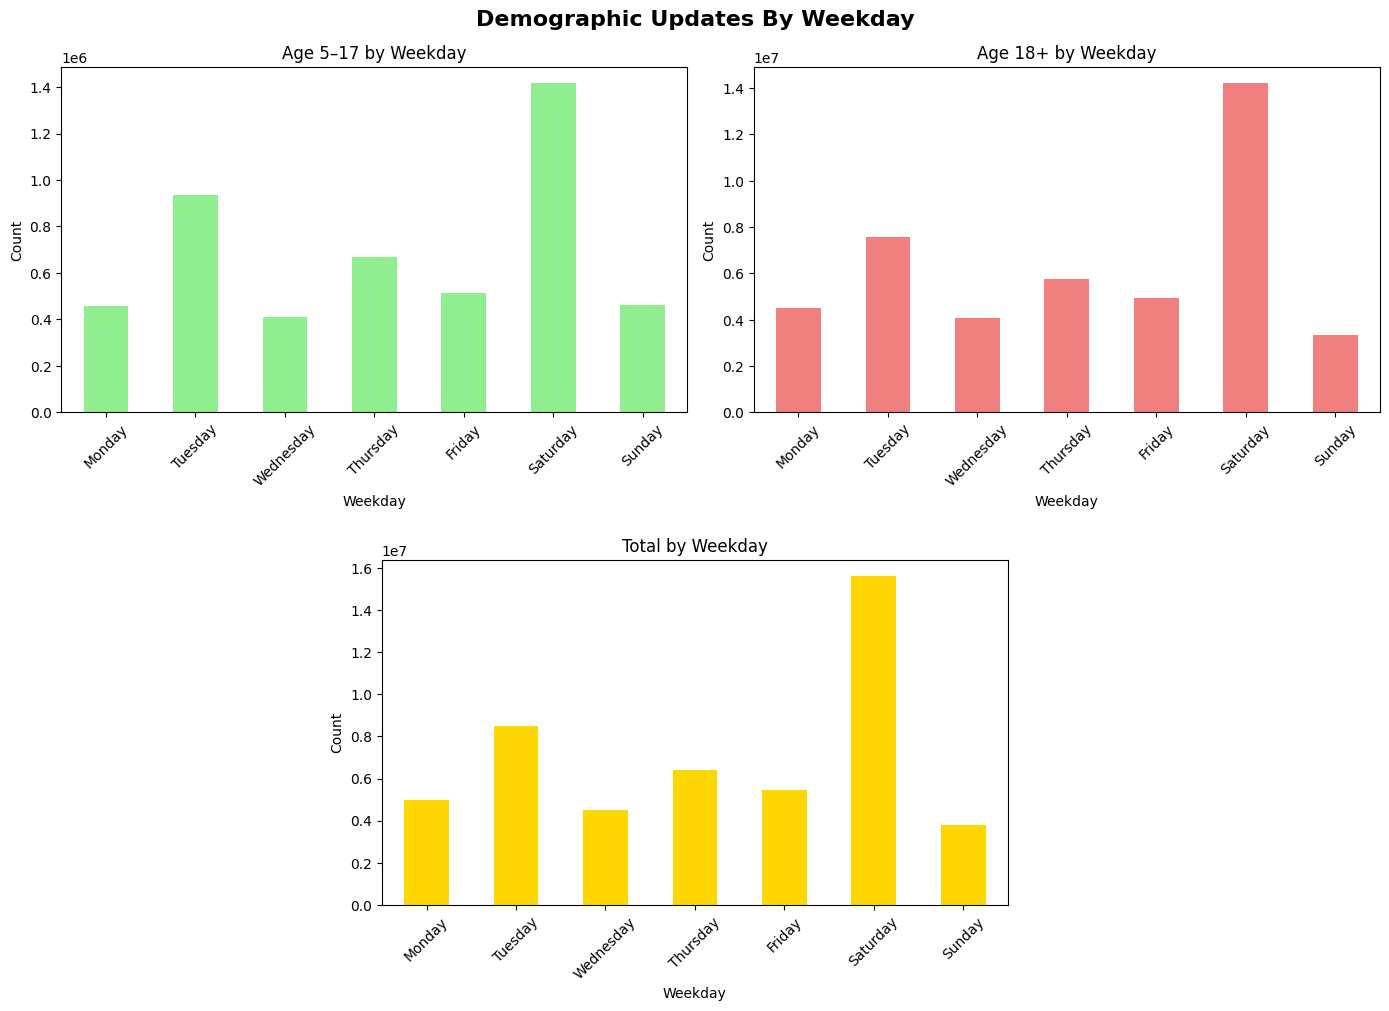

           demo_age_5_17  demo_age_17_     total
Weekday                                         
Monday            457166       4525476   4982642
Tuesday           934768       7571240   8506008
Wednesday         412604       4087012   4499616
Thursday          670510       5754257   6424767
Friday            512678       4958353   5471031
Saturday         1415356      14202736  15618092
Sunday            460342       3332689   3793031


In [74]:
# Group by weekday and sum all age groups
weekday_grouped = df.groupby('Weekday')[['demo_age_5_17','demo_age_17_', 'total']].sum()

# Reorder by day of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_grouped = weekday_grouped.reindex(weekday_order)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row
weekday_grouped['demo_age_5_17'].plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5–17 by Weekday')
axes[0, 0].set_ylabel('Count')

weekday_grouped['demo_age_17_'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Weekday')
axes[0, 1].set_ylabel('Count')

# Bottom plot (same size)
weekday_grouped['total'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Weekday')
axes[1, 0].set_ylabel('Count')

# Remove unused subplot
fig.delaxes(axes[1, 1])

# Apply tight_layout FIRST
plt.tight_layout()

# Now center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,  # horizontal center
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('Demographic Updates By Weekday', fontsize=16, fontweight='bold', y=1.02)
plt.show()
print(weekday_grouped)


MonthWise Analysis

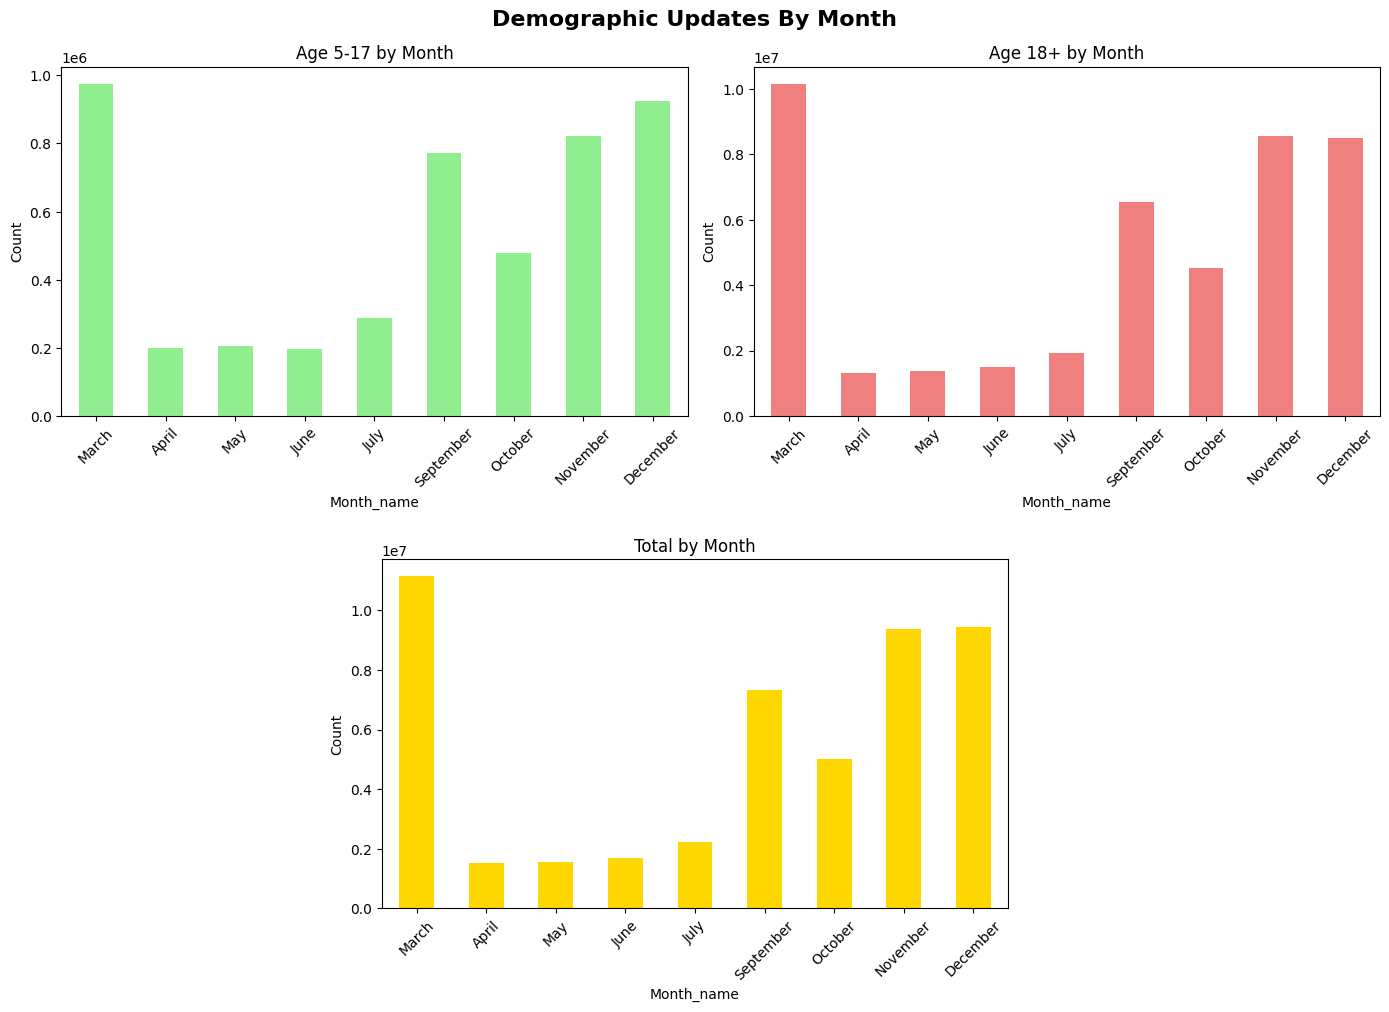

            demo_age_5_17  demo_age_17_     total
Month_name                                       
March              976095      10171463  11147558
April              198744       1316928   1515672
May                204893       1361394   1566287
June               197767       1487795   1685562
July               288449       1932266   2220715
September          770788       6553272   7324060
October            479232       4531734   5010966
November           821273       8566328   9387601
December           926183       8510583   9436766


In [75]:
# Group by month and sum all age groups
month_grouped = df.groupby('Month_name')[['demo_age_5_17','demo_age_17_', 'total']].sum()

# Reorder by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_grouped = month_grouped.reindex([m for m in month_order if m in month_grouped.index])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row
month_grouped['demo_age_5_17'].plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by Month')
axes[0, 0].set_ylabel('Count')

month_grouped['demo_age_17_'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Month')
axes[0, 1].set_ylabel('Count')

# Bottom plot (same size)
month_grouped['total'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Month')
axes[1, 0].set_ylabel('Count')

# Remove unused subplot
fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Demographic Updates By Month', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(month_grouped)


Month over Month Growth rate

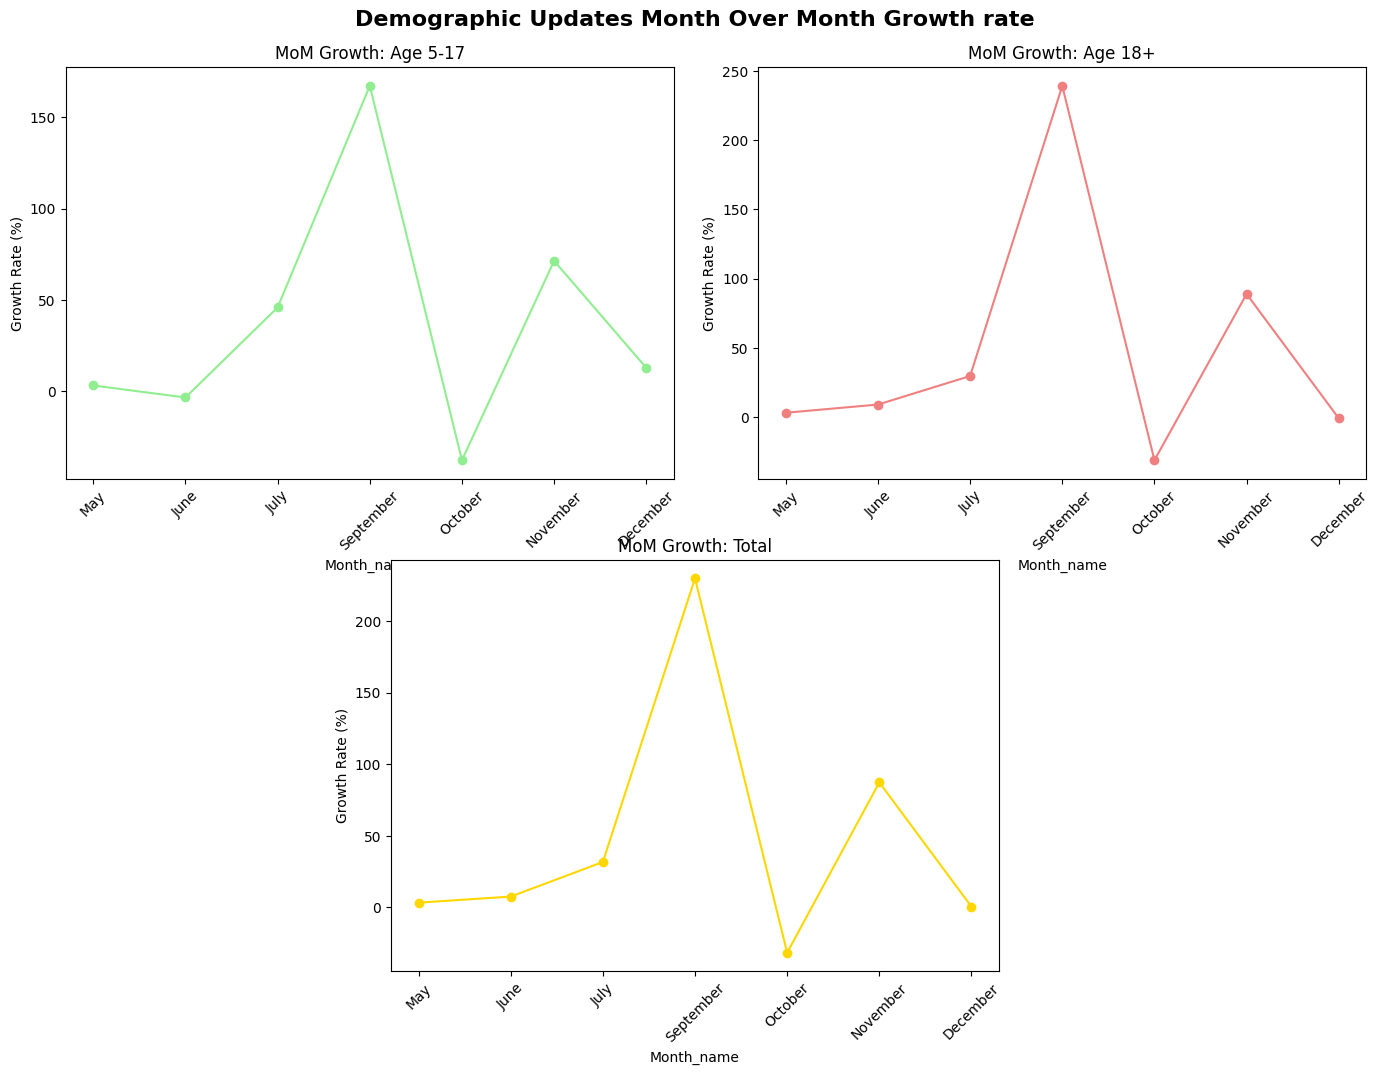

            demo_age_5_17  demo_age_17_       total
Month_name                                         
May              3.093930      3.376494    3.339443
June            -3.477913      9.284674    7.615143
July            45.852948     29.874479   31.749233
September      167.218122    239.149579  229.806391
October        -37.825706    -30.847766  -31.582128
November        71.372738     89.029806   87.341143
December        12.774071     -0.650746    0.523723


In [76]:
# Calculate MoM growth rate (%)
# month_growth = month_grouped.pct_change() * 100
month_growth = month_grouped.pct_change().iloc[2:] * 100

# Create line plots with SAME colors as original code
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

month_growth['demo_age_5_17'].plot(ax=axes[0, 0], color='lightgreen', marker='o')
axes[0, 0].set_title('MoM Growth: Age 5-17')
axes[0, 0].set_ylabel('Growth Rate (%)')

month_growth['demo_age_17_'].plot(ax=axes[0, 1], color='lightcoral', marker='o')
axes[0, 1].set_title('MoM Growth: Age 18+')
axes[0, 1].set_ylabel('Growth Rate (%)')

month_growth['total'].plot(ax=axes[1, 0], color='gold', marker='o')
axes[1, 0].set_title('MoM Growth: Total')
axes[1, 0].set_ylabel('Growth Rate (%)')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Demographic Updates Month Over Month Growth rate', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(month_growth)


Date-Wise ( ascending )

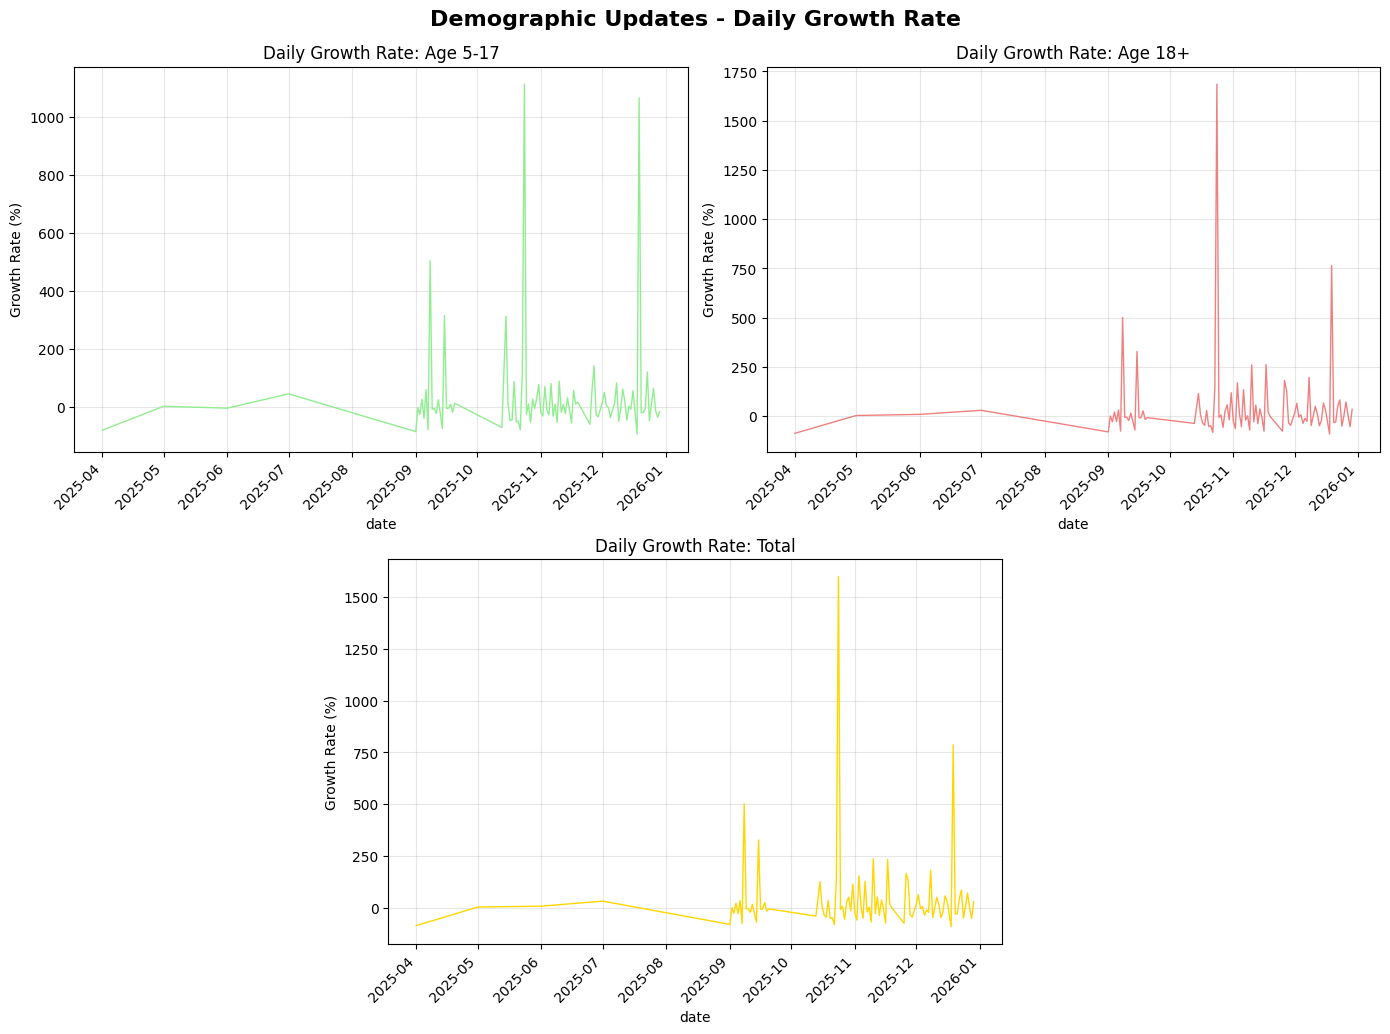

            demo_age_5_17  demo_age_17_      total
date                                              
2025-04-01     -79.638867    -87.052718 -86.403551
2025-05-01       3.093930      3.376494   3.339443
2025-06-01      -3.477913      9.284674   7.615143
2025-07-01      45.852948     29.874479  31.749233
2025-09-01     -84.405562    -79.850445 -80.442110
2025-09-02      -1.562847      0.426359   0.220342
2025-09-03     -25.138327    -27.984184 -27.694690
2025-09-04      27.289731     21.289562  21.921508
2025-09-05     -38.495995    -27.385135 -28.606871
2025-09-06      59.789603     31.761713  34.416727


In [77]:
# Group by date and sum all age groups
daily_grouped = df.groupby('date')[['demo_age_5_17', 'demo_age_17_', 'total']].sum()

# Calculate daily growth rate (%)
daily_growth = daily_grouped.pct_change().iloc[1:] * 100

# Create line plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

daily_growth['demo_age_5_17'].plot(ax=axes[0, 0], color='lightgreen', linewidth=1)
axes[0, 0].set_title('Daily Growth Rate: Age 5-17')
axes[0, 0].set_ylabel('Growth Rate (%)')
axes[0, 0].grid(True, alpha=0.3)

daily_growth['demo_age_17_'].plot(ax=axes[0, 1], color='lightcoral', linewidth=1)
axes[0, 1].set_title('Daily Growth Rate: Age 18+')
axes[0, 1].set_ylabel('Growth Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

daily_growth['total'].plot(ax=axes[1, 0], color='gold', linewidth=1)
axes[1, 0].set_title('Daily Growth Rate: Total')
axes[1, 0].set_ylabel('Growth Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Demographic Updates - Daily Growth Rate', fontsize=16, fontweight='bold', y=1.02)

plt.show()
print(daily_growth.head(10))

Day-Wise (0-31)

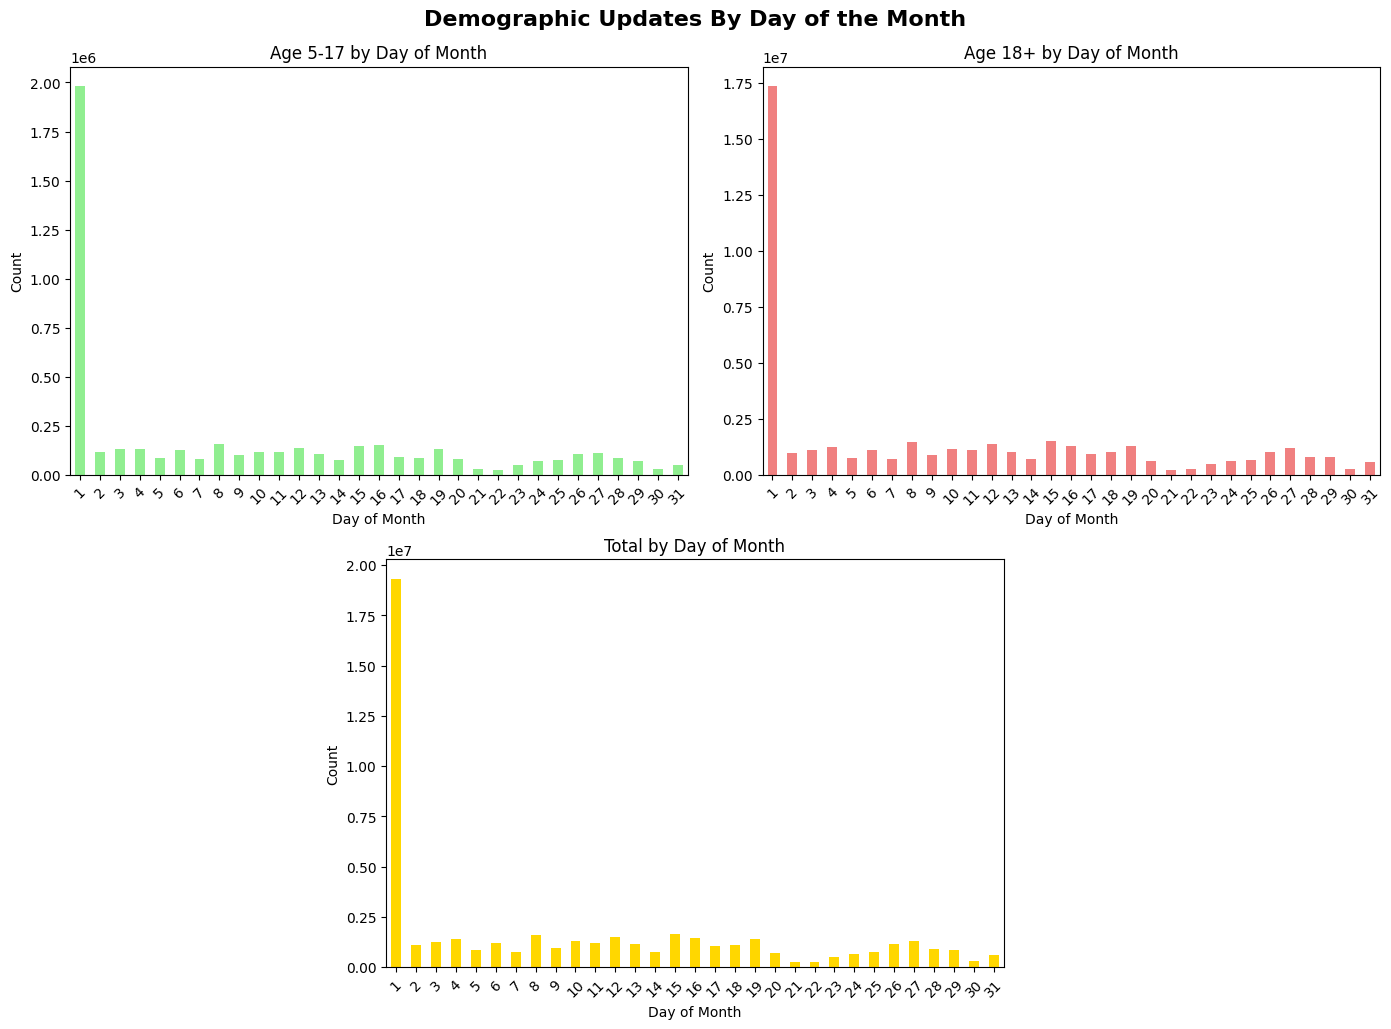

      demo_age_5_17  demo_age_17_     total
date                                       
1           1981758      17348747  19330505
2            116968        977291   1094259
3            129118       1117717   1246835
4            132013       1258533   1390546
5             87902        749274    837176
6            127375       1104342   1231717
7             79823        686462    766285
8            156120       1450359   1606479
9            102063        864885    966948
10           116946       1170779   1287725
11           114951       1086485   1201436
12           137126       1374722   1511848
13           105897       1034069   1139966
14            75852        707435    783287
15           149174       1498229   1647403
16           149665       1288885   1438550
17            90733        947579   1038312
18            87522       1000721   1088243
19           131578       1269431   1401009
20            81940        625662    707602
21            31007        20821

In [78]:
# Group by day of month and sum all age groups
day_grouped = df.groupby(df['date'].dt.day)[['demo_age_5_17', 'demo_age_17_', 'total']].sum()

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

day_grouped['demo_age_5_17'].plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by Day of Month')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Day of Month')

day_grouped['demo_age_17_'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Day of Month')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Day of Month')

day_grouped['total'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Day of Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Day of Month')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Demographic Updates By Day of the Month', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(day_grouped)

# Geographical Analysis

State-Wise Grouping

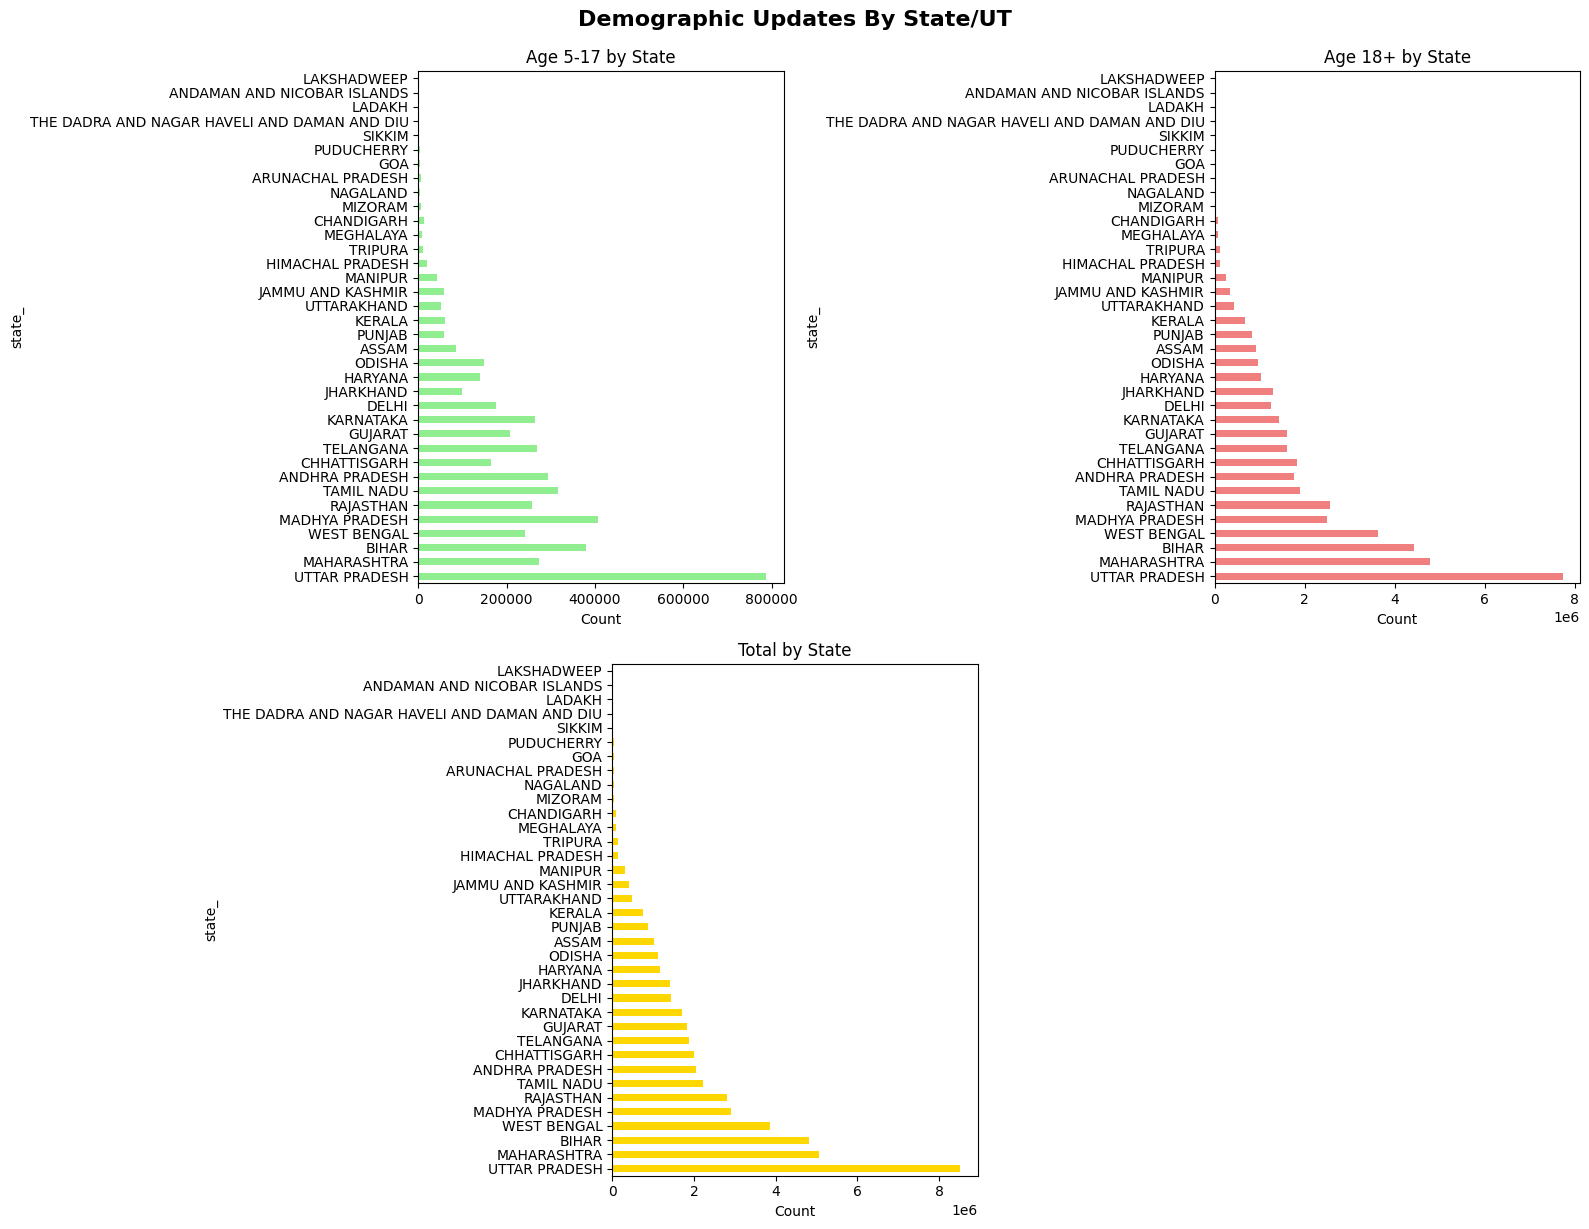

                                              demo_age_5_17  demo_age_17_  \
state_                                                                      
UTTAR PRADESH                                        788379       7733536   
MAHARASHTRA                                          273322       4781281   
BIHAR                                                379915       4433267   
WEST BENGAL                                          242560       3630116   
MADHYA PRADESH                                       407098       2505840   
RAJASTHAN                                            256971       2557305   
TAMIL NADU                                           315686       1897217   
ANDHRA PRADESH                                       294472       1755669   
CHHATTISGARH                                         165207       1840231   
TELANGANA                                            269535       1612749   
GUJARAT                                              208419       1615841   

In [79]:
# Group by state and sum all age groups
state_grouped = df.groupby('state_')[['demo_age_5_17', 'demo_age_17_',  'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

state_grouped['demo_age_5_17'].plot(kind='barh', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by State')
axes[0, 0].set_xlabel('Count')

state_grouped['demo_age_17_'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by State')
axes[0, 1].set_xlabel('Count')


state_grouped['total'].plot(kind='barh', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by State')
axes[1, 0].set_xlabel('Count')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Demographic Updates By State/UT', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(state_grouped)

In [65]:
base_colors = {
    'demo_age_5_17': 'lightgreen',
    'demo_age_17_': 'lightcoral',
    'total': 'gold'
}
rename = {
    'demo_age_5_17': 'Age 5-17',
    'demo_age_17_': 'Age 18+',
    'total': 'Total'
}
cols = ['demo_age_5_17', 'demo_age_17_', 'total']


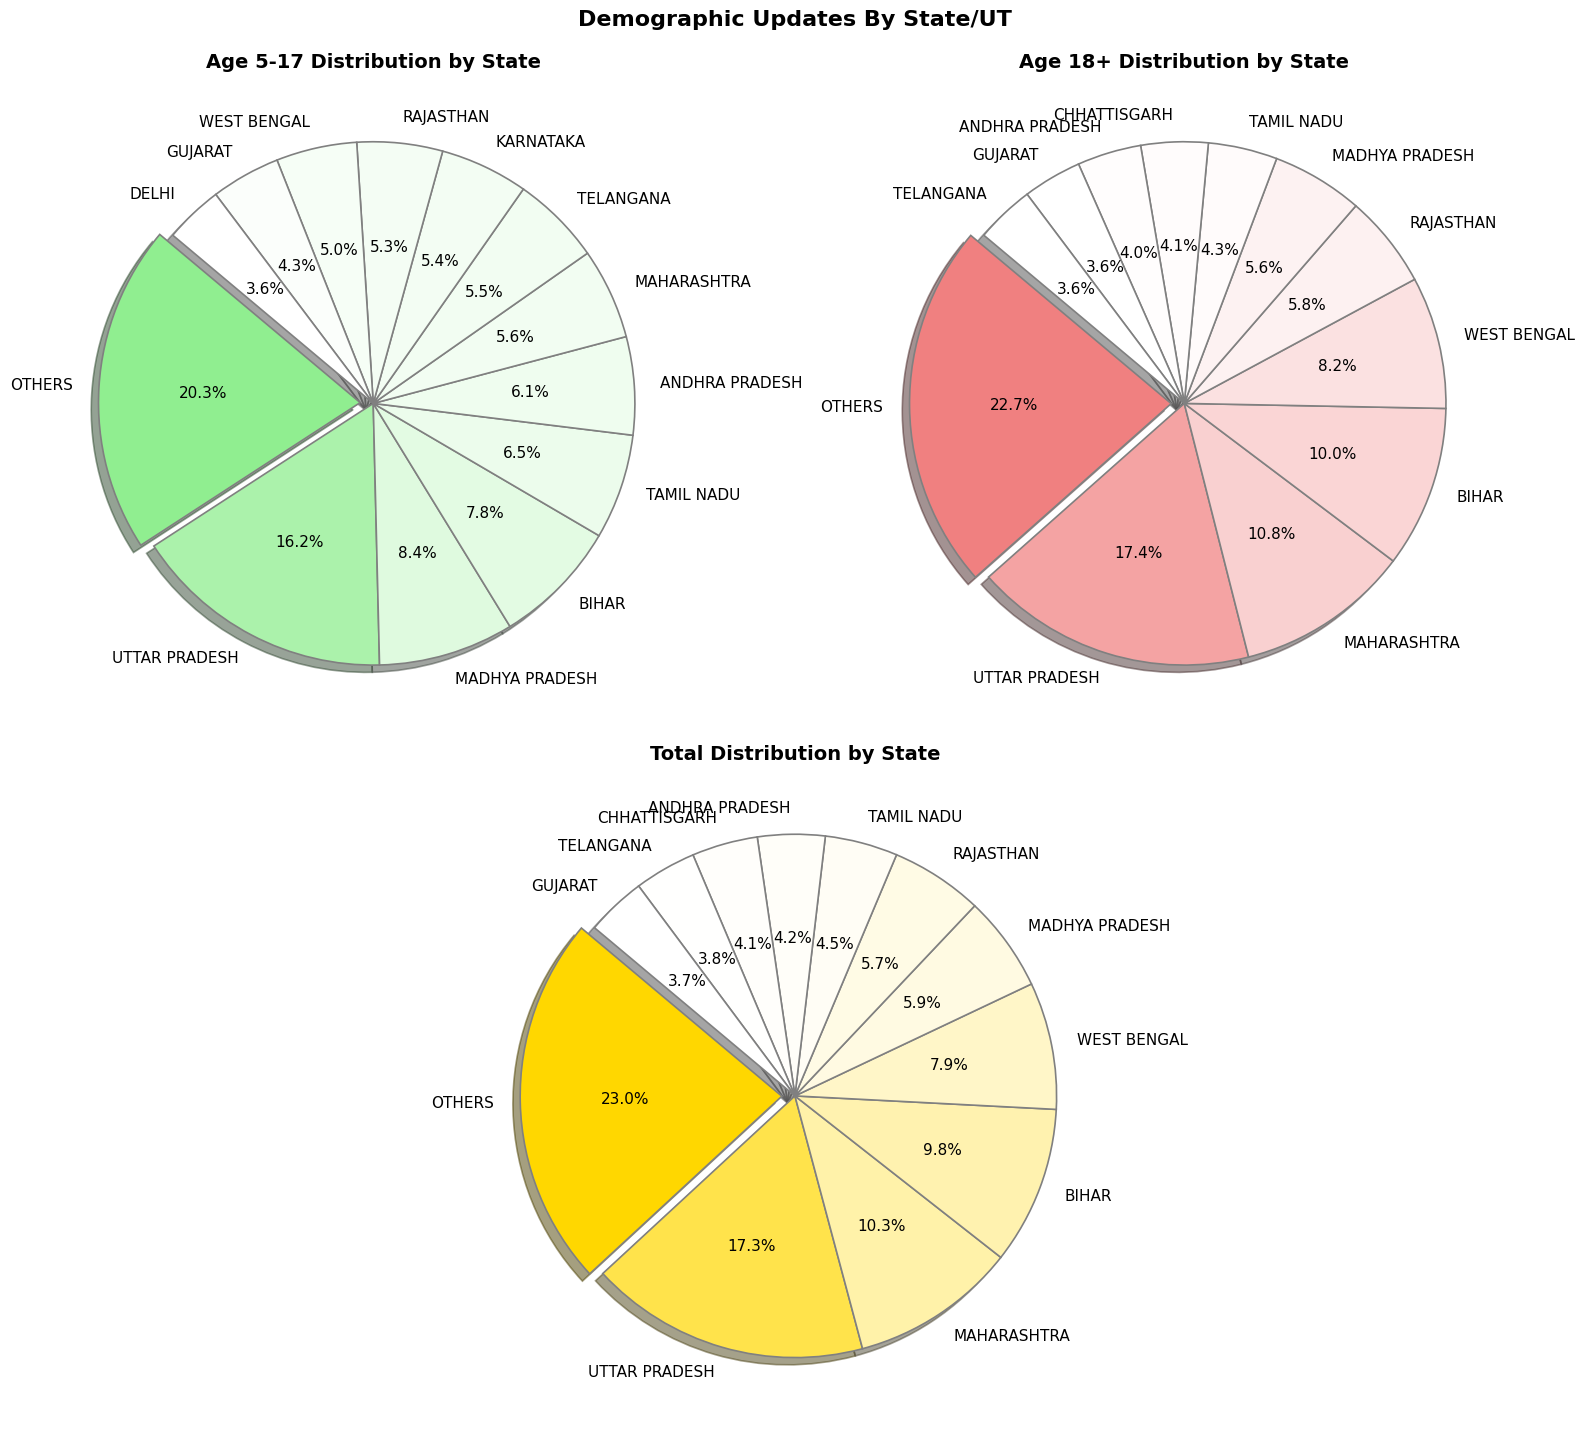

In [80]:

threshold_pct = 3.5  # Values below 3.5% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = state_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Create color shades: darker for higher %, lighter for lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by State", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Demographic Updates By State/UT', fontsize=16, fontweight='bold', y=1.02)

plt.show()


Analyzing For Delhi

In [67]:
delhi = df[df['state_']=="DELHI"]
print(delhi.shape)
delhi = delhi.drop(columns=['state_'])
print(delhi.shape)
print(len(delhi['district_'].unique()))

(10512, 10)
(10512, 9)
11


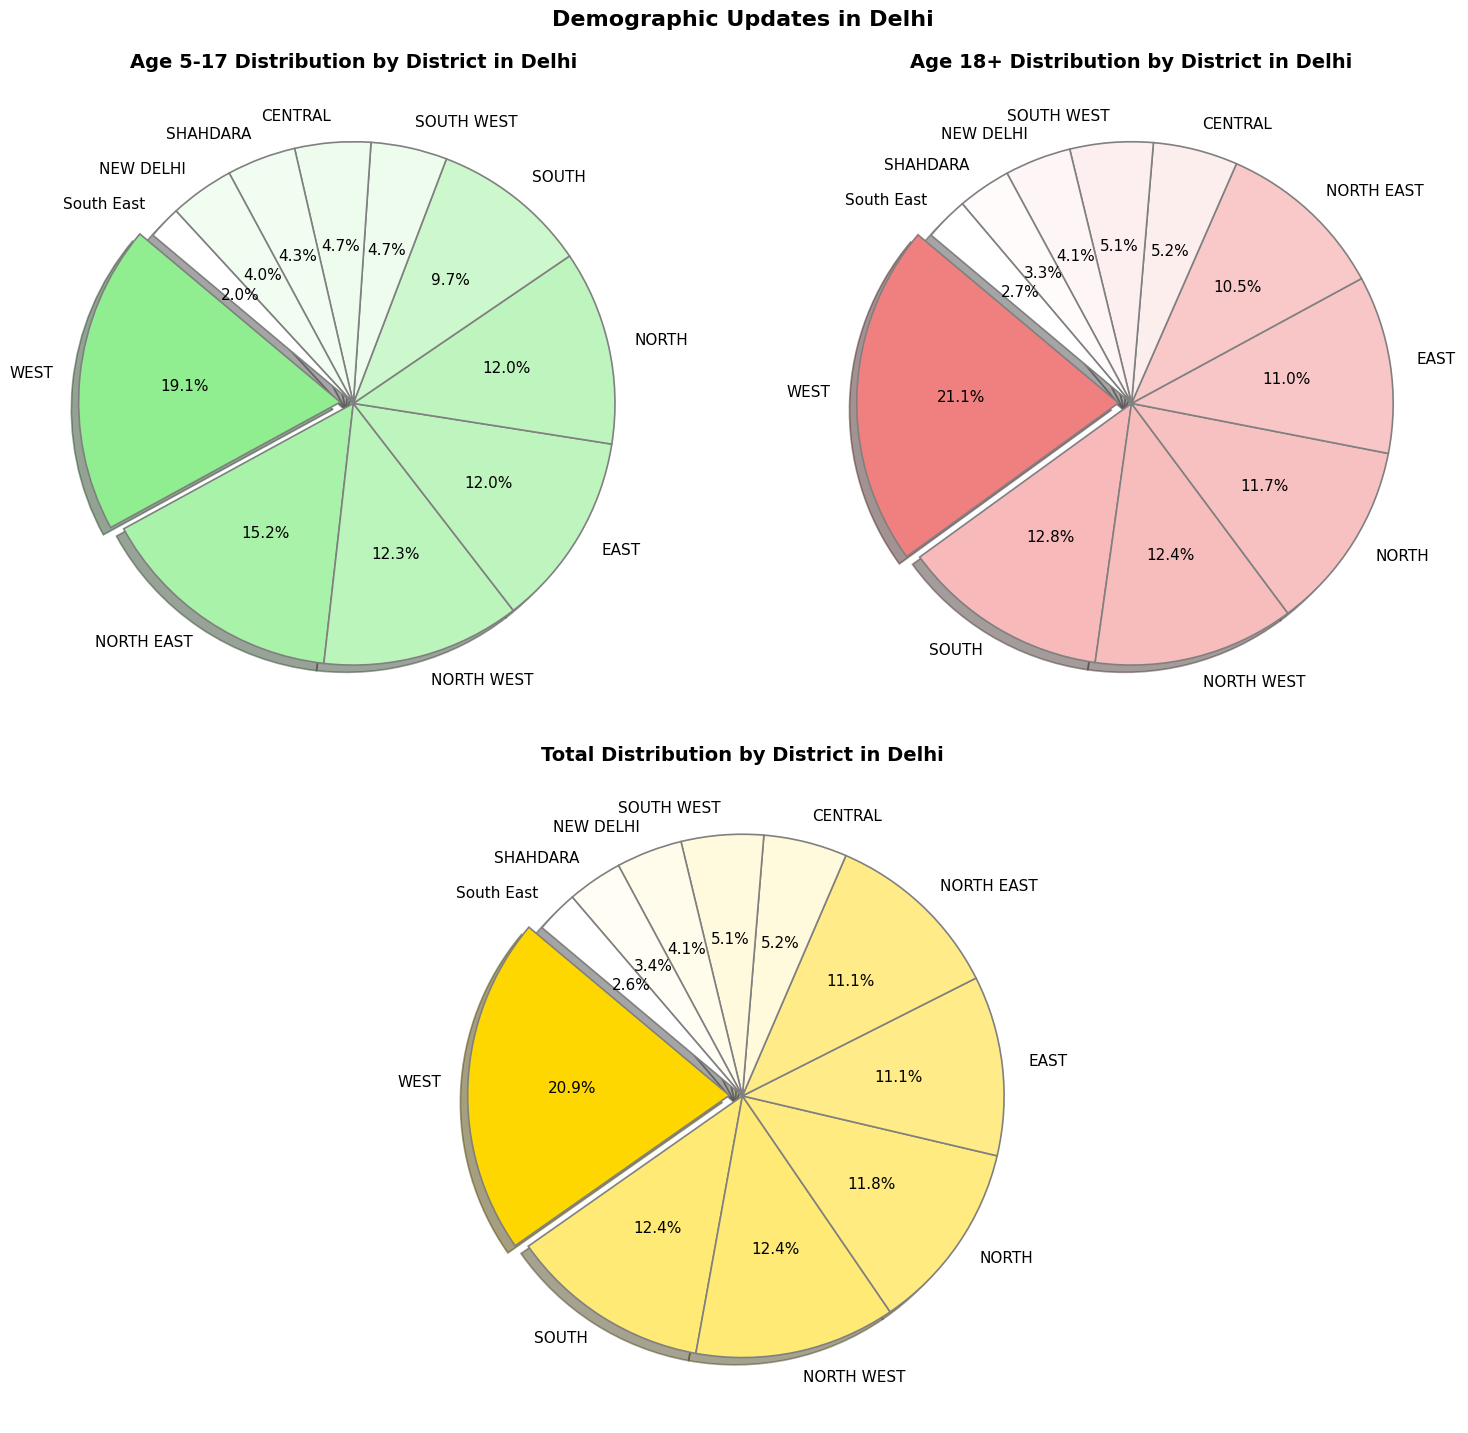

In [81]:
# Group Delhi by district and sum all age groups
delhi_district_grouped = delhi.groupby('district_')[['demo_age_5_17', 'demo_age_17_', 'total']].sum().sort_values('total', ascending=False)

threshold_pct = 2  # Values below 2% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = delhi_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in Delhi", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Demographic Updates in Delhi', fontsize=16, fontweight='bold', y=1.02)

plt.show()

NCR-Analysis

In [69]:
'''
Fetched NCR list from https://ncrpb.nic.in/ncrconstituent.html
'''
NCR = 'CENTRAL,EAST,NORTH,NORTH EAST,NORTH WEST,NEW DELHI,SOUTH,SOUTH EAST,SOUTH WEST,SHAHDARA,WEST,FARIDABAD,GURUGRAM,SONIPAT,PANIPAT,JHAJJAR,ROHTAK,REWARI,NUH,PALWAL,KURUKSHETRA,KAITHAL,KARNAL,AMBALA,PANCHKULA,GHAZIABAD,GAUTAM BUDDHA NAGAR,BULANDSHAHR,MEERUT,BAGHPAT,HAPUR,MUZAFFARNAGAR,SHAMLI,ALWAR,BHARATPUR'
ncr_states = set(['DELHI','UTTAR PRADESH','RAJASTHAN','HARYANA'])
ncr_districts = set(NCR.split(','))

In [70]:
# Filter data for NCR states and districts
ncr_df = df[(df['state_'].isin(ncr_states)) & (df['district_'].isin(ncr_districts))]
print(f'NCR dataframe shape: {ncr_df.shape}')
print(f'NCR states: {ncr_df["state_"].unique()}')
print(f'NCR districts count: {ncr_df["district_"].nunique()}')

NCR dataframe shape: (51999, 10)
NCR states: ['UTTAR PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA']
NCR districts count: 34


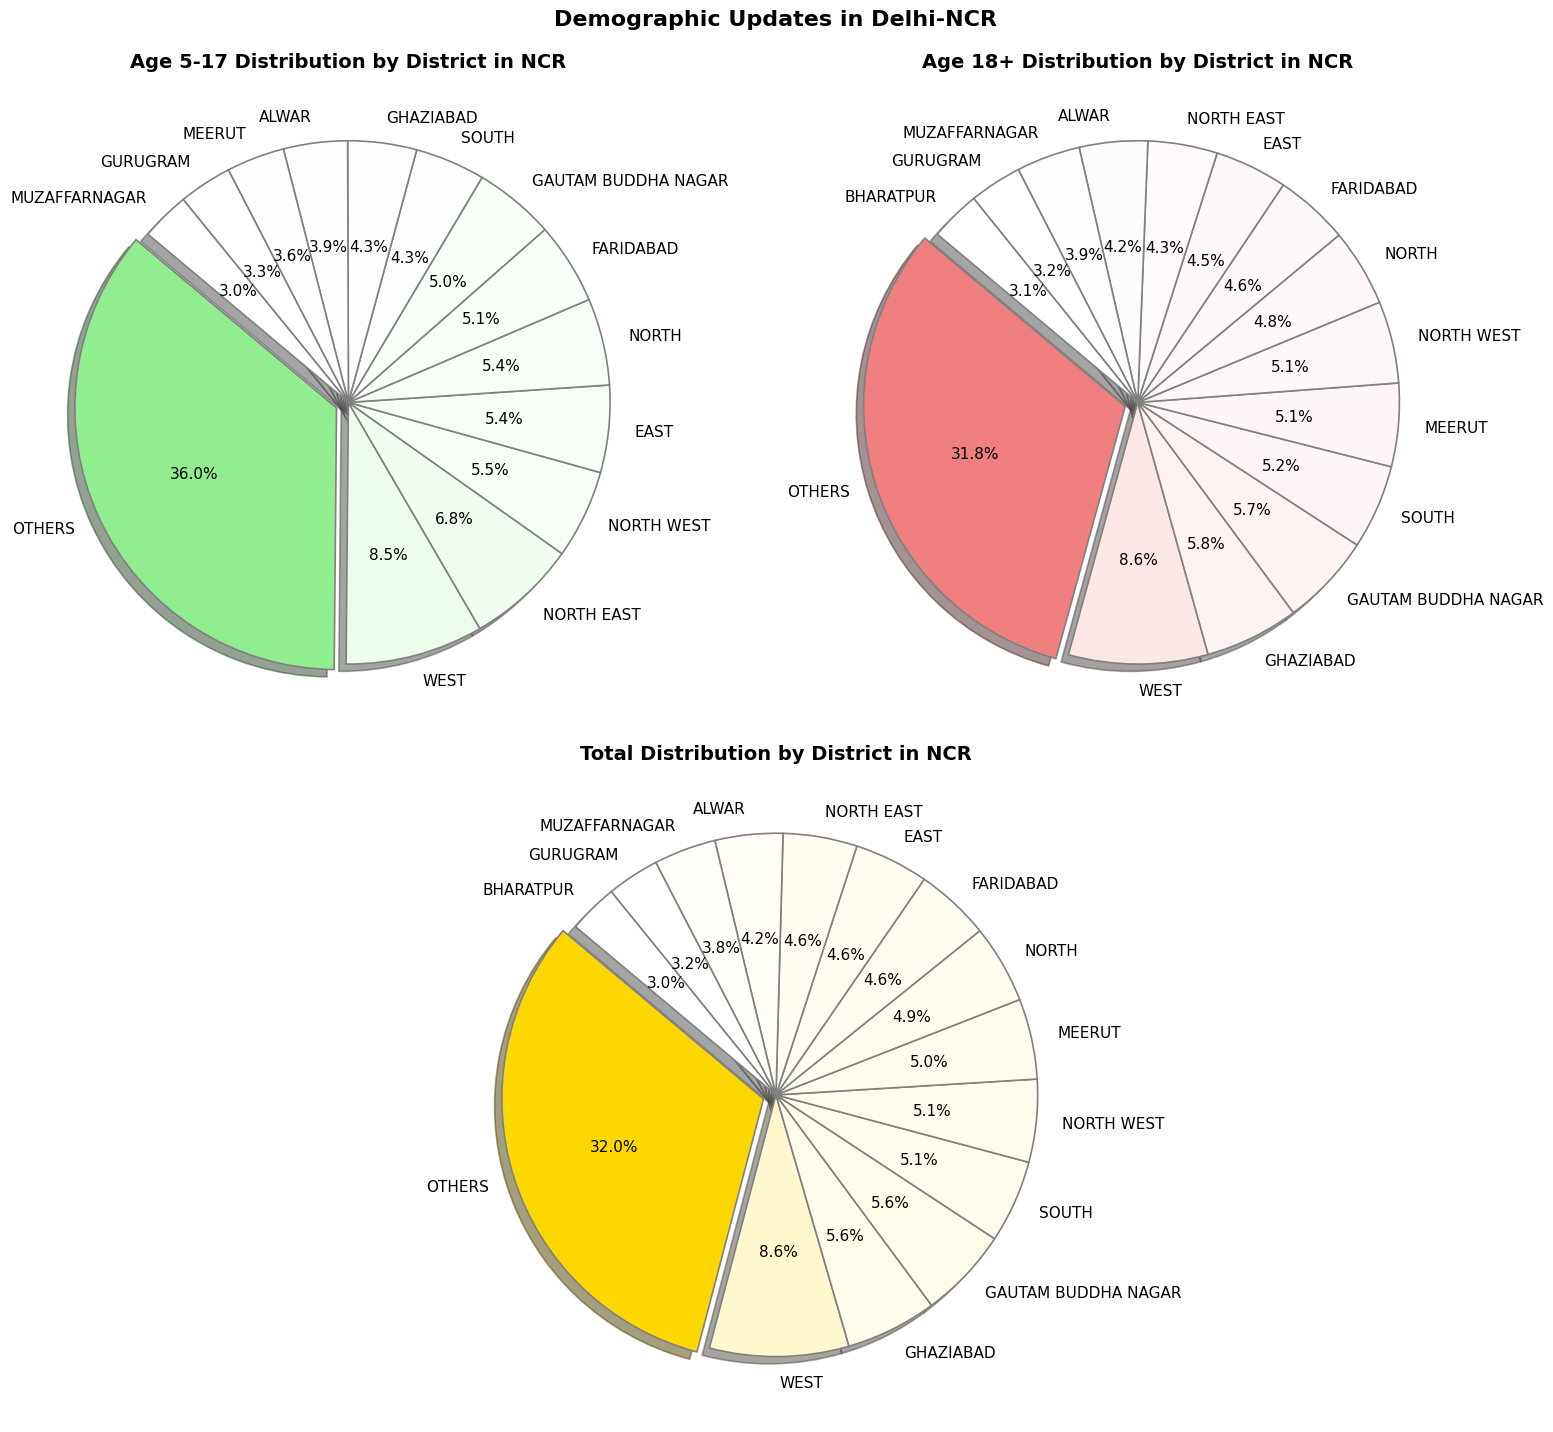

In [82]:
# Group NCR by district and sum all age groups
ncr_district_grouped = ncr_df.groupby('district_')[['demo_age_5_17', 'demo_age_17_', 'total']].sum().sort_values('total', ascending=False)
threshold_pct = 3  # Values below 3% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = ncr_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in NCR", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Demographic Updates in Delhi-NCR', fontsize=16, fontweight='bold', y=1.02)

plt.show()

Region-Wise grouping

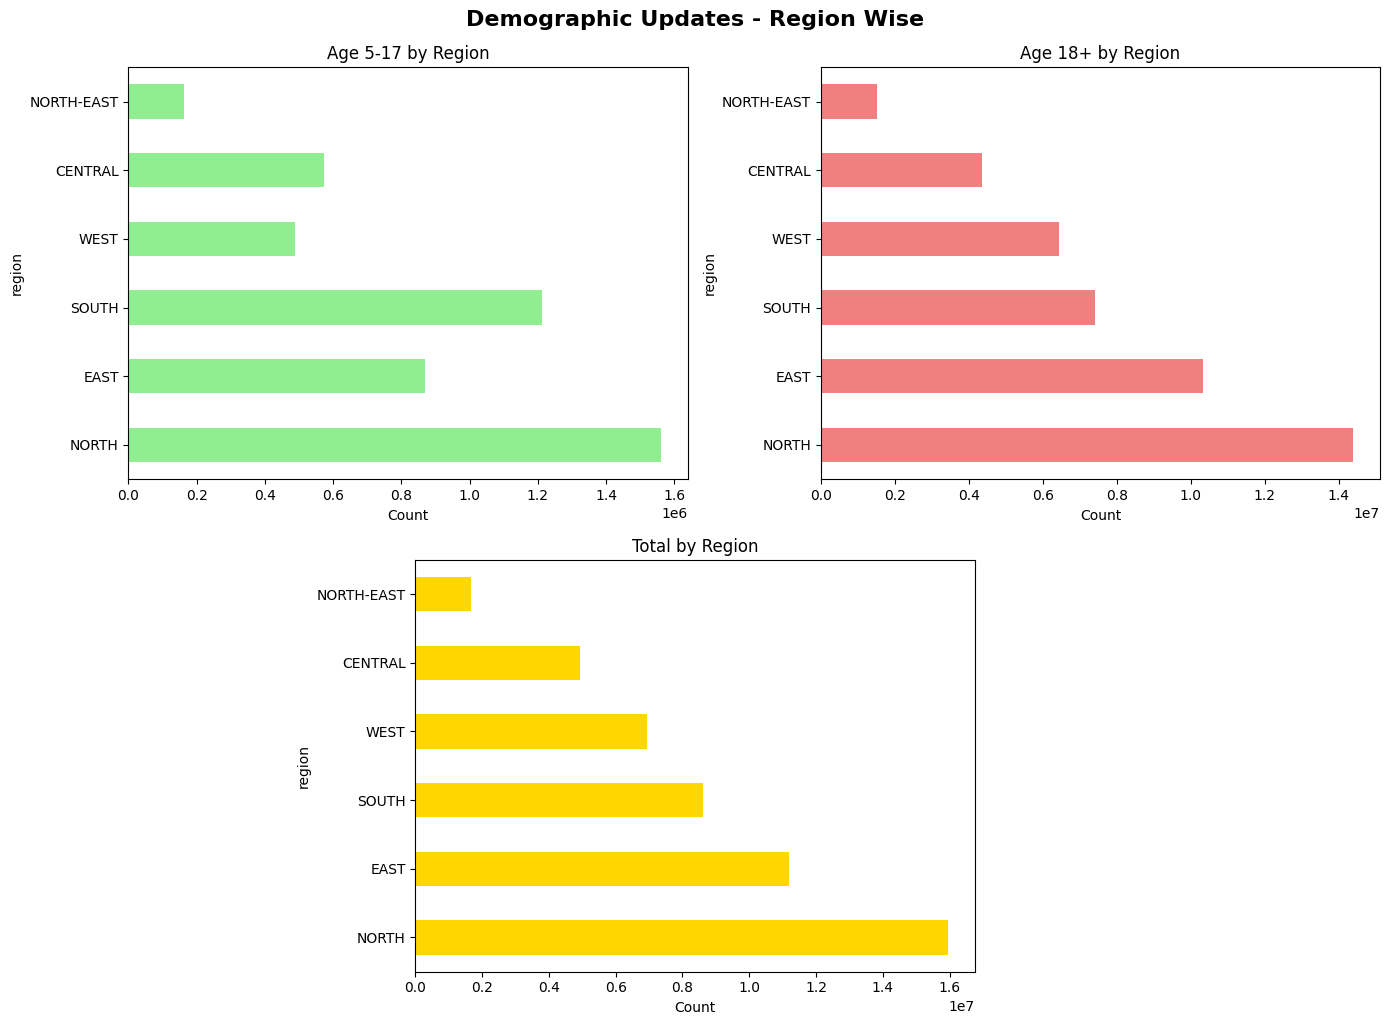

            demo_age_5_17  demo_age_17_     total
region                                           
NORTH             1560725      14392004  15952729
EAST               869458      10330882  11200340
SOUTH             1211081       7413773   8624854
WEST               486994       6439260   6926254
CENTRAL            572305       4346071   4918376
NORTH-EAST         162861       1509773   1672634


In [83]:
# Group by region and sum all age groups
region_grouped = df.groupby('region')[['demo_age_5_17', 'demo_age_17_', 'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

region_grouped['demo_age_5_17'].plot(kind='barh', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by Region')
axes[0, 0].set_xlabel('Count')

region_grouped['demo_age_17_'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Region')
axes[0, 1].set_xlabel('Count')

region_grouped['total'].plot(kind='barh', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Region')
axes[1, 0].set_xlabel('Count')


fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Demographic Updates - Region Wise', fontsize=16, fontweight='bold', y=1.02)

plt.show()
print(region_grouped)

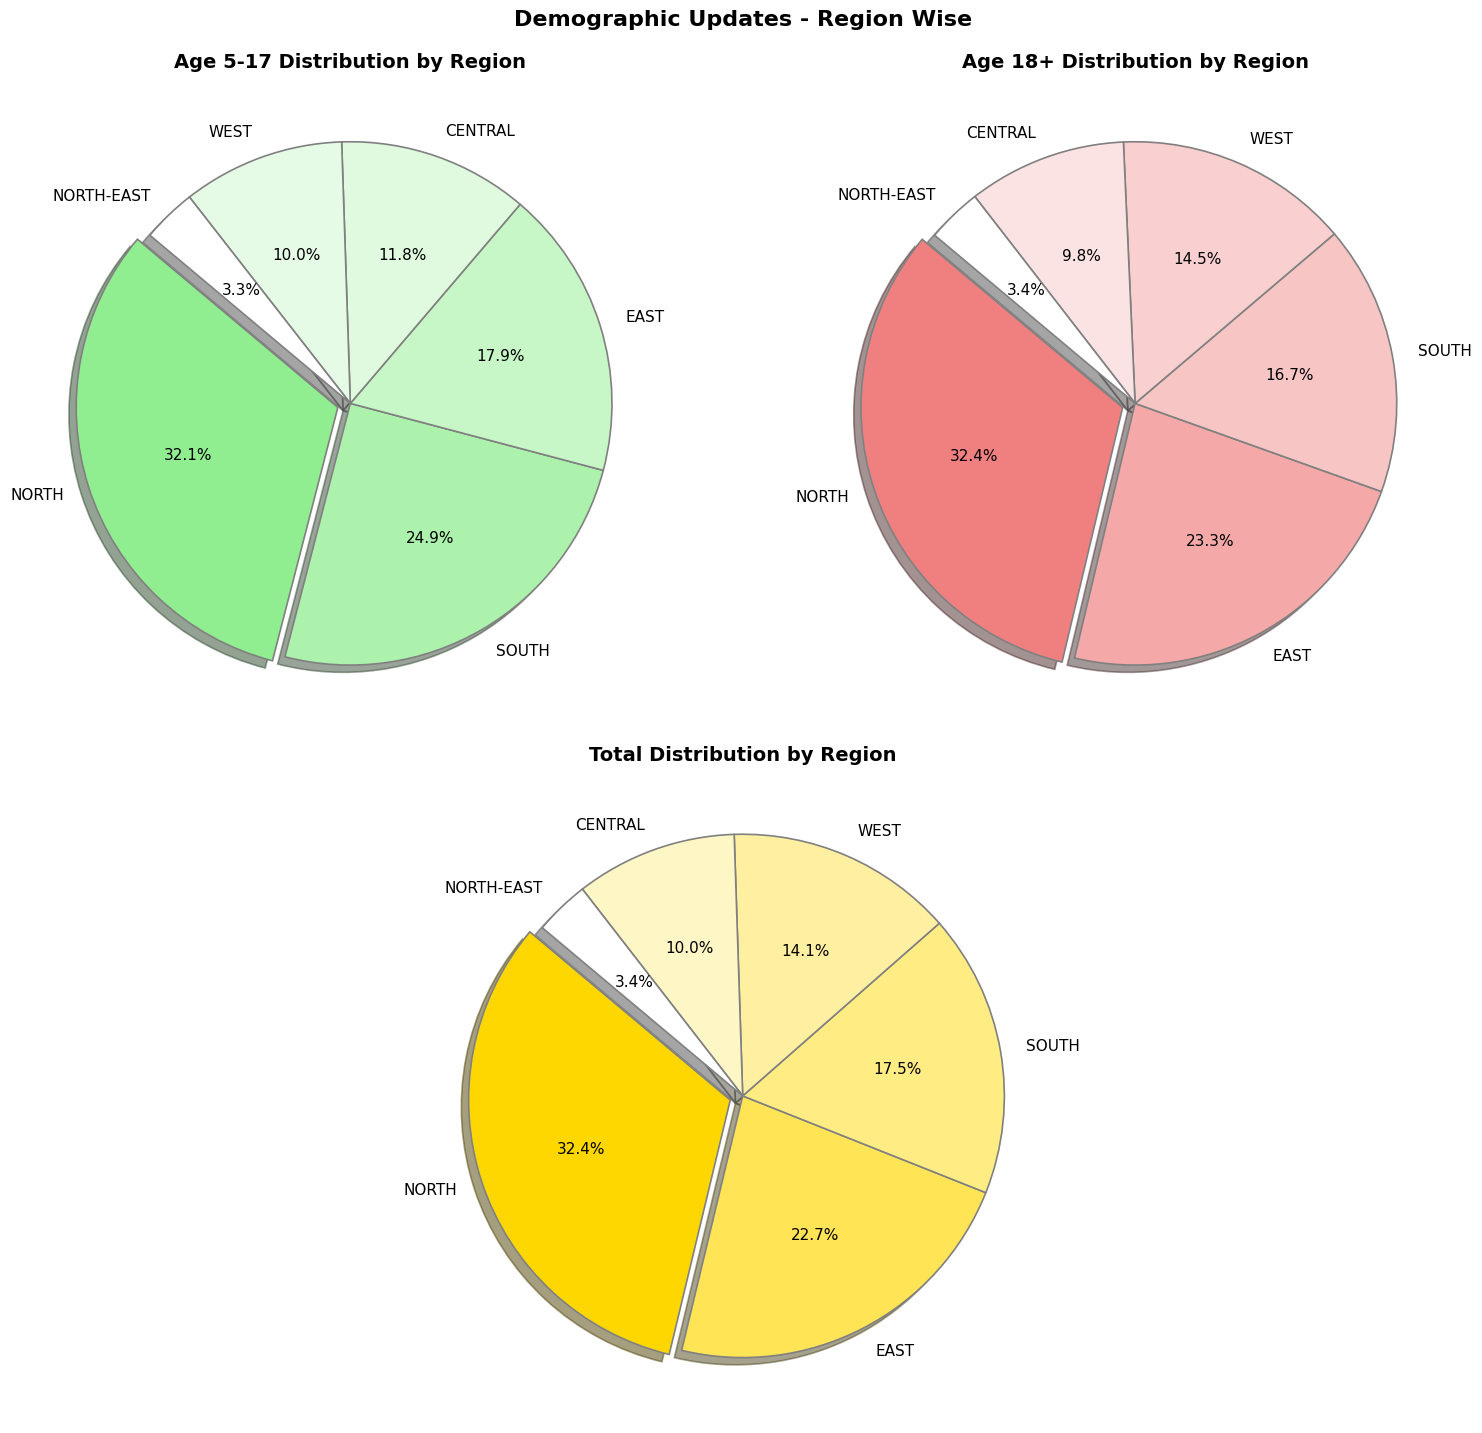

In [84]:
threshold_pct = 2  # Values below 2% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = region_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by Region", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Demographic Updates - Region Wise', fontsize=16, fontweight='bold', y=1.02)

plt.show()
